## Chirp.

We construct chirp data with some gaussian noise.

We want to fit a smooth model to the data: SplinesDynamicModel with unknown knot number and locations.


In [1]:
import numpy as numpy
import math

from astropy.io import ascii

from BayesicFitting import NestedSampler
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import Tools
import matplotlib.pyplot as plt

from BayesicFitting import SplinesDynamicModel

In [11]:
#%matplotlib osx
%matplotlib inline

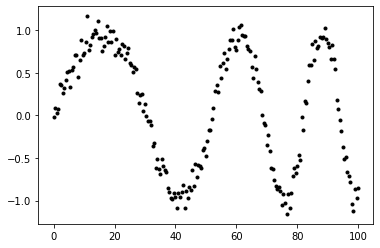

In [2]:
t = numpy.linspace( 0, 100, 201, dtype=float )
ym = numpy.sin( 2 * math.pi * numpy.exp( t / 75 ) )
y = numpy.random.seed( 12345 )
y = ym + numpy.random.randn( 201 ) * 0.1
plt.plot( t, y, 'k.' )
plt.show()

In [3]:
knots =[0, 25, 50, 75, 100]
mxk = 15
mdl = SplinesDynamicModel( knots=knots, dynamic=True, maxKnots=mxk, minKnots=4 )
mdl.setLimits( lowLimits=[-4.0], highLimits=[+4.0] )

# Tools.printclass( mdl )


Fit all parameters of
  DynModBasicSplines of order 3 with 5 knots.
Using a Gauss error distribution with with unknown scale
Moving the walkers with   GalileanEngine  BirthEngine  DeathEngine  StructureEngine
Iteration     logZ        H       LowL     npar    parameters
       0  -2.36e+06      4.6  -2.36e+06     11  [   -0.723   -2.674    2.895   -0.194    0.441 ...]
     100       -688      4.9       -682     12  [   -1.904   -2.780   -0.565    2.524    2.153 ...]
     200       -454      4.7       -449     11  [   -2.563   -3.821    2.263   -1.768   -2.821 ...]
     300       -413      5.5       -406     12  [    2.380    2.296   -3.246   -1.836   -1.948 ...]
     400       -386      6.2       -379     11  [    3.086   -0.050   -2.411    3.207   -1.688 ...]
     500       -366      6.8       -358     11  [    2.346   -1.599   -3.703    1.874   -2.699 ...]
     600       -346      8.3       -337     12  [   -2.528   -1.666   -0.255    0.150   -0.362 ...]
     700       -333      8.5 

    8000       78.2     74.9        157     14  [    0.060    0.412    1.160    0.811   -1.937 ...]
    8100       78.4     75.3        157     15  [   -0.033    0.012    0.512    1.183    0.631 ...]
    8200       78.5     75.6        158     15  [   -0.064    0.054    0.740    1.049    0.782 ...]
    8300       78.6     75.9        159     15  [   -0.034    0.038    0.789    1.010    0.863 ...]
    8400       78.6     76.2        160     16  [   -0.051    0.121    0.595    1.104    0.769 ...]
    8500       78.7     76.5        161     15  [   -0.037    0.011    0.761    1.034    0.789 ...]
    8600       78.8     76.7        162     14  [    0.018    0.405    1.086    0.925   -1.884 ...]
    8700       78.8     77.0        163     16  [    0.010    0.171    0.694    1.027    0.800 ...]
    8800       78.8     77.3        164     14  [    0.007    0.469    1.112    0.856   -2.070 ...]
    8900       78.9     77.5        164     14  [   -0.004    0.445    1.176    0.837   -1.958 ...]


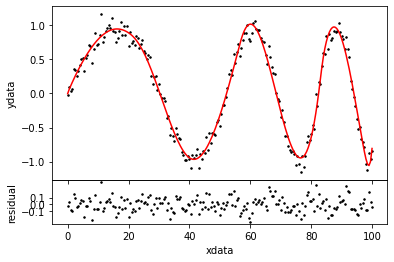

In [4]:
eng = ["galilean", "birth", "death", "struct"]
ns = NestedSampler( t, mdl, y, seed=1235, engines=eng )
ns.distribution.setLimits( [0.01,100] )
ns.minimumIterations = 1000
ns.verbose=2
#ns.engines[1].slow = 100

evid = ns.sample( plot=True )



In [5]:
sl = ns.samples
kmed = sl.getMedianIndex()
smpl = sl[kmed]
print( fmt( smpl.model.knots, max=None ) )
print( fmt( smpl.model.parameters, max=None ) )
print( fmt( sl[-1].model.knots, max=None ) )
print( fmt( sl[-1].model.parameters, max=None ) )

[    0.000    0.322   19.746   20.251   39.599   56.060   56.265   82.353   84.770   85.058   96.443  100.000]
[   -0.038   -0.005    0.766    1.035    0.824   -1.870   -0.426    2.406   -3.511    0.582    1.433    0.153   -1.214
    -1.005]
[    0.000   13.121   26.049   41.631   55.882   60.874   81.925   82.450   82.665   93.898   94.100  100.000]
[    0.018    0.510    1.085    0.820   -1.916    0.206    1.879   -2.766    0.119    1.139    1.299   -0.695   -1.111
    -0.895]


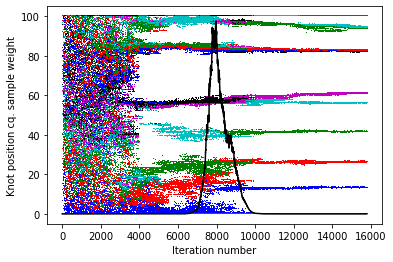

In [12]:
## Plot the evolutie of knots and sample weights
cc = ['k,', 'b,', 'r,', 'g,', 'c,', 'm,']
sl = ns.samples
ka = numpy.zeros( ( mxk, len( sl ) ), dtype=float )
for k,s in enumerate( sl ) :
    n = len( s.model.knots )
    ka[:n,k] = s.model.knots
for j in range( mxk ) :
    plt.plot( ka[j,:], cc[j%6] )
wgts = sl.getWeightEvolution()
plt.plot( 100000 * wgts, 'k-' )
plt.xlabel( "Iteration number" )
plt.ylabel( "Knot position cq. sample weight")
plt.show()

